# Results dPCR SMARCB1 mutations, Case3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
samples_id_dict = {'SP4381':'Blood','SP 4381':'Blood','M09 735':'Bone\nMarrow','MO 9735':'Bone\nMarrow','B19 9912':'MRT',
                  'C- 69185':'Control1 -','N19-33.1':'Kidney','N19 33.1':'Kidney','N19-33.2':'Liver',
                  'N19 33.2':'Liver','N19-33.3':'Pancreas','N19 33.3':'Pancreas','N19-33.4':'Heart',
                  'N19 33.4':'Heart','N19-33.5':'Lung','N19 33.5':'Lung',
                  '5319 AH':'Medulla','N19-33.7':'Spleen','N19 33.7':'Spleen','N19-33.8':'Brain','N19 33.8':'Brain',
                  'C+ RT003 P2G5':'Control1+','C+ RT003P2G5':'Control1+',
                  'C+ RT003 P2G8':'Control1+','C+ RT003 P1-B4':'Control2+',
                  'C- 85726':'Control2-','H2O':'H2O','B10-2884':'NB','B10 2884':'NB','B19 991.2':'MRT'}

In [3]:
import numpy as np

In [4]:
#import data
root_to_data = './data/'

df1 = pd.read_csv(root_to_data+'SMARCB1_279del_IGV_28.02.23.csv',sep='\t',skiprows=11,nrows=13)
df2 = pd.read_csv(root_to_data+'SMARCB1_279del_IVG_14.03.23_export.csv',sep=',',skiprows=11,nrows=7)
indel_df = pd.concat([df1,df2],ignore_index=True)
indel_df['SMARCB1'] = 'indel'
df3 = pd.read_csv(root_to_data+'SMARCB1_TRANSLOCACIÓN_23.03.23_export.csv',sep=',',skiprows=11,nrows=10)
df4 = pd.read_csv(root_to_data+'SMARCB1_TRANSLOCACIÓN_27.03.23_export.csv',sep=',',skiprows=11,nrows=8)
transl_df = pd.concat([df3,df4],ignore_index=True)
transl_df['SMARCB1'] = 'transl'
results_df = pd.concat([indel_df,transl_df],ignore_index=True)
results_df = results_df[['Sample','Target/Total','CI Target/Total','SMARCB1']]
results_df['sample_name'] = results_df['Sample'].map(samples_id_dict)
results_df = results_df.fillna('0')
results_df['Target/Total'].iloc[5] = '1.344%'

def get_num(x):

    if x == '0' or x == None:
        num = 0
    elif 'E' in str(x):
        n=float(x[0:4])
        exp=int(x[-2])
        num = n / 100**exp
    else:
        num=float(x[0:-1])/100
    
    return num


results_df['target'] = results_df['Target/Total'].apply(lambda x: get_num(x)) 
results_df['ci_target_low'] = results_df['CI Target/Total'].str.split(' -- ',expand=True)[0]
results_df['ci_target_high'] = results_df['CI Target/Total'].str.split(' -- ',expand=True)[1]
results_df['ci_target_low'] = results_df['ci_target_low'].apply(lambda x: get_num(x)) 
results_df['ci_target_high'] = results_df['ci_target_high'].apply(lambda x: get_num(x))
results1_df = results_df.iloc[[2]]
results2_df = results_df.iloc[4:38]
results3_df = pd.concat([results1_df,results2_df],ignore_index=True)
results3_df

,Sample,Target/Total,CI Target/Total,SMARCB1,sample_name,target,ci_target_low,ci_target_high
0,M09 735,4.92E-2%,2.16E-2% -- 0.115%,indel,Bone\nMarrow,0.000492,0.000216,0.001150
1,C- 69185,0.00%,0,indel,Control1 -,0.000000,0.000000,0.000000
2,N19-33.1,1.344%,1.145% -- 1.573%,indel,Kidney,0.013440,0.011450,0.015730
3,N19-33.2,0.23%,0.147% -- 0.379%,indel,Liver,0.002300,0.001470,0.003790
4,N19-33.3,0.14%,9.18E-2% -- 0.212%,indel,Pancreas,0.001400,0.000918,0.002120
5,N19-33.4,0.74%,0.56% -- 0.967%,indel,Heart,0.007400,0.005600,0.009670
6,N19-33.5,0.31%,0.219% -- 0.447%,indel,Lung,0.003100,0.002190,0.004470
7,N19-33.7,0,0,indel,Spleen,0.000000,0.000000,0.000000
8,N19-33.8,0,0,indel,Brain,0.000000,0.000000,0.000000
9,C+ RT003 P2G5,48.38%,45.587% -- 51.297%,indel,Control1+,0.483800,0.455870,0.512970


In [5]:
results3_df[['SMARCB1','sample_name','target','ci_target_low','ci_target_high']].to_csv('./digital_pcr_results.tsv',sep='\t',index=None)

In [6]:
tissues = ['MRT','Kidney','Heart','Lung','Liver','Pancreas','Brain','Medulla','Spleen','Bone\nMarrow','Blood','NB']

In [7]:
data = {}
data['tissues'] = tissues
for mut in ['indel','transl']:
    df = results3_df[results3_df['SMARCB1']==mut]
    for num in ['target','ci_target_low','ci_target_high']:
        dictionary = dict(zip(df['sample_name'],df[num]))
        mut_list = []
        for tissue in tissues:
            value = dictionary[tissue]
            mut_list.append(value)
        data[mut+'_'+num] = mut_list
data

{'tissues': ['MRT',
  'Kidney',
  'Heart',
  'Lung',
  'Liver',
  'Pancreas',
  'Brain',
  'Medulla',
  'Spleen',
  'Bone\nMarrow',
  'Blood',
  'NB'],
 'indel_target': [0.42307,
  0.01344,
  0.0074,
  0.0031,
  0.0023,
  0.0014000000000000002,
  0.0,
  0.000338,
  0.0,
  0.000492,
  6.429999999999999e-06,
  0.00018],
 'indel_ci_target_low': [0.39265,
  0.01145,
  0.005600000000000001,
  0.00219,
  0.00147,
  0.000918,
  0.0,
  0.000113,
  0.0,
  0.00021600000000000002,
  1.44e-06,
  5.95e-06],
 'indel_ci_target_high': [0.45546,
  0.01573,
  0.00967,
  0.00447,
  0.00379,
  0.00212,
  0.0,
  0.000997,
  0.0,
  0.00115,
  0.000285,
  0.000532],
 'transl_target': [0.31263,
  0.0105,
  0.00722,
  0.0030299999999999997,
  0.0011899999999999999,
  0.00159,
  0.000439,
  7.82e-06,
  0.000493,
  0.00028700000000000004,
  9.51e-06,
  9.04e-06],
 'transl_ci_target_low': [0.26898,
  0.00908,
  0.0059099999999999995,
  0.00203,
  0.000826,
  0.00114,
  0.00023799999999999998,
  1.31e-06,
  0.0002

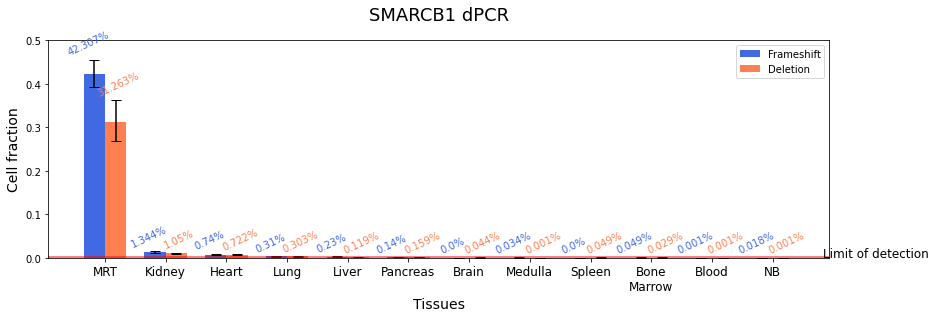

In [8]:
df = pd.DataFrame(data)

df['indel_ci_target_low'] = df['indel_target'] - df['indel_ci_target_low']
df['indel_ci_target_high'] = df['indel_ci_target_high']- df['indel_target']
df['transl_ci_target_low'] = df['transl_target'] - df['transl_ci_target_low']
df['transl_ci_target_high'] = df['transl_ci_target_high'] - df['transl_target']

# set the width of the bars
bar_width = 0.35

# set the positions of the bars on the x-axis
r1 = range(len(df))
r2 = [x + bar_width for x in r1]

# create subplots
fig, ax = plt.subplots(figsize=(14,4))

# create bar plots
ax.bar(r1, df['indel_target'], width=bar_width, yerr=[df['indel_ci_target_low'], df['indel_ci_target_high']], capsize=5, label='Frameshift',color='royalblue')
ax.bar(r2, df['transl_target'], width=bar_width, yerr=[df['transl_ci_target_low'], df['transl_ci_target_high']], capsize=5, label='Deletion',color='coral')

# set limit of detection
ax.axhline(0.001,color='red',linewidth=2,alpha=0.5)
ax.text(len(df['tissues']),0.001,s='Limit of detection',size=12)

# plot value per column
n = -0.1
color = 'royalblue'
for variant in ['indel_target','transl_target']:
    y = df[variant].tolist()
    z = df[variant.split('_target')[0]+'_ci_target_high'].tolist()
    variant_dict = {'indel_target':'frameshift','transl_target':'deletion'}
    variant = variant_dict[variant]
    for i, v in enumerate(y):
        ax.text(i+n , v+z[i]+0.01 , str(round(v*100,3))+'%',horizontalalignment='center',color=color,rotation=25)
    n = n +0.5
    color='coral'

# set x-axis tick labels
ax.set_xticks([x + bar_width / 2 for x in r1])
ax.set_xticklabels(df['tissues'],size=12)

# set plot title and axis labels
ax.set_title('SMARCB1 dPCR',size=18,pad=20)
ax.set_xlabel('Tissues',size=14)
ax.set_ylabel('Cell fraction',size=14)
ax.set_ylim(0,0.5)

# add legend
ax.legend()

# show plot
plt.show()

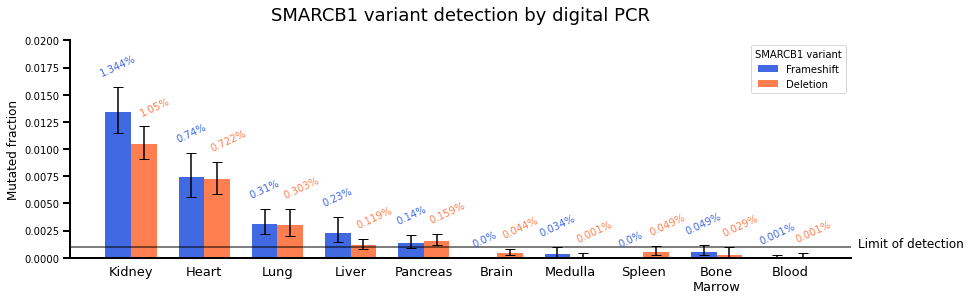

In [9]:
df = pd.DataFrame(data)

df = df[df['tissues']!='MRT']
df = df[df['tissues']!='NB']

df['indel_ci_target_low'] = df['indel_target'] - df['indel_ci_target_low']
df['indel_ci_target_high'] = df['indel_ci_target_high']- df['indel_target']
df['transl_ci_target_low'] = df['transl_target'] - df['transl_ci_target_low']
df['transl_ci_target_high'] = df['transl_ci_target_high'] - df['transl_target']

# set the width of the bars
bar_width = 0.35

# set the positions of the bars on the x-axis
r1 = range(len(df))
r2 = [x + bar_width for x in r1]

# create subplots
fig, ax = plt.subplots(figsize=(14,4))

# set colors
colors_dict = {'frameshift':'royalblue','deletion':'coral'}

# create bar plots
ax.bar(r1, df['indel_target'], width=bar_width, yerr=[df['indel_ci_target_low'], df['indel_ci_target_high']], capsize=5, label='Frameshift',color='royalblue')
ax.bar(r2, df['transl_target'], width=bar_width, yerr=[df['transl_ci_target_low'], df['transl_ci_target_high']], capsize=5, label='Deletion',color='coral')

# set limit of detection
ax.axhline(0.001,color='black',linewidth=2,alpha=0.5)
ax.text(len(df['tissues'])+0.1,0.001,s='Limit of detection',size=12)

# plot value per column
n = 0
for variant in ['indel_target','transl_target']:
    y = df[variant].tolist()
    z = df[variant.split('_target')[0]+'_ci_target_high'].tolist()
    variant_dict = {'indel_target':'frameshift','transl_target':'deletion'}
    variant = variant_dict[variant]
    for i, v in enumerate(y):
        ax.text(i+n , v+z[i]+0.001 , str(round(v*100,3))+'%',horizontalalignment='center',color=colors_dict[variant],rotation=25)
    n = n +0.5

# set x-axis tick labels
ax.set_xticks([x + bar_width / 2 for x in r1])
ax.set_xticklabels(df['tissues'],size=13)

# set plot title and axis labels
ax.set_title('SMARCB1 variant detection by digital PCR',size=18,pad=20)
ax.set_xlabel('',size=14)
ax.set_ylabel('Mutated fraction',size=12)
ax.set_ylim(0,0.02)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_linewidth(2) 
ax.spines['bottom'].set_linewidth(2)
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=2,length=7)

# add legend
ax.legend(title='SMARCB1 variant')

#save plot
plt.savefig('./dpcr_smarcb1_pt1.png',dpi=300, format='png',transparent=True,bbox_inches='tight')


# show plot
plt.show()